# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
Equipe: Marianna Leandra, Nayara Thaiza e Samuel Soares <br/>
**Trabalho: Exploração de outras bases de dados - ENADE** <br/>

**ENADE 2017** <br/>
Dados retirados de: http://portal.inep.gov.br/web/guest/microdados <br/>
Análise: Desempenho dos alunos de instituições federais que estudam na modalidade presencial e moram sem familiares em comparação ao que residem com familiares.


In [1]:
import pandas
import matplotlib.pyplot as plt

enade2017=pandas.read_csv("MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2017.shape

(537436, 150)

In [2]:
enade2017.columns[0:10]

Index(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO', 'CO_CURSO',
       'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO'],
      dtype='object')

In [3]:
'''
nota geral: 0-98 
questão08: Qual a renda total de sua família, incluindo seus rendimentos?
A = Até 1,5 salário mínimo (até R$ 1.405,50).
B = De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00).
C = De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50).
D = De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00).
E = De 6 a 10 salários mínimos (R$ 5. 622,01 a R$ 9.370,00).
F = De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00).
G = Acima de 30 salários mínimos (mais de R$ 28.110,00).

QE_I06 Onde e com quem você mora atualmente?
A = Em casa ou apartamento, sozinho.
B = Em casa ou apartamento, com pais e/ou parentes.
C = Em casa ou apartamento, com cônjuge e/ou filhos.
D = Em casa ou apartamento, com outras pessoas (incluindo república).
E = Em alojamento universitário da própria instituição.
F = Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)

'''

tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_MODALIDADE', 'QE_I06'])
tabela.head(10)

,NT_GER,CO_CATEGAD,CO_ORGACAD,CO_MODALIDADE,QE_I06
0,"52,6",1,10028,1,A
1,"63,1",1,10028,1,C
2,"33,7",1,10028,1,B
3,"58,1",1,10028,1,D
4,"46,3",1,10028,1,B
5,"64,2",1,10028,1,B
6,"41,4",1,10028,1,B
7,"48,8",1,10028,1,B
8,"52,9",1,10028,1,B
9,"62,7",1,10028,1,B


In [4]:
##limpeza dos dados

#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')
print (tabela['NT_GER'])

#observe os NaN (not a number)

0         52.6
1         63.1
2         33.7
3         58.1
4         46.3
5         64.2
6         41.4
7         48.8
8         52.9
9         62.7
10        51.9
11        58.4
12        77.7
13        37.5
14        66.4
15        71.5
16        57.8
17        62.7
18        75.1
19        50.5
20        46.1
21        44.1
22        47.9
23        55.1
24        73.5
25        60.4
26        62.7
27        49.5
28        44.9
29        27.7
          ... 
537406     NaN
537407     NaN
537408     NaN
537409     NaN
537410     NaN
537411     NaN
537412     NaN
537413     NaN
537414     NaN
537415     NaN
537416     NaN
537417     NaN
537418     NaN
537419     NaN
537420     NaN
537421     NaN
537422     NaN
537423     NaN
537424     NaN
537425     NaN
537426     NaN
537427     NaN
537428     NaN
537429     NaN
537430     NaN
537431     NaN
537432     NaN
537433     NaN
537434     NaN
537435     NaN
Name: NT_GER, Length: 537436, dtype: object


In [5]:
'''No arquivo 'Dicionário de variáveis dos Microdados do Enade_Edição 2017' descreve que:
o codigo 222 no campo TP_PR_GER significa ausente 
556 e 888 são participações desconsideradas.
Portanto, algumas notas podem ser desconsideradas dependendo do seu objetivo, 
e aqui, será de calcular a média daqueles que fizeram a prova.
'''
tabela=tabela.loc[(tabela['NT_GER'].notnull())]
#print(tabela['NT_GER'])
#converte de str para float
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])
print(tabela['NT_GER'])
print(tabela['NT_GER'].mean())


0         52.6
1         63.1
2         33.7
3         58.1
4         46.3
5         64.2
6         41.4
7         48.8
8         52.9
9         62.7
10        51.9
11        58.4
12        77.7
13        37.5
14        66.4
15        71.5
16        57.8
17        62.7
18        75.1
19        50.5
20        46.1
21        44.1
22        47.9
23        55.1
24        73.5
25        60.4
26        62.7
27        49.5
28        44.9
29        27.7
          ... 
534887    43.8
534888    46.9
534890    48.2
534891    49.6
534892    63.2
534893    31.9
534895    71.5
534896    59.6
534897    15.1
534898    44.7
534900    30.8
534901    16.3
534902    66.3
534903    34.9
534904    71.9
534905    56.0
534906    45.9
534907    43.3
534908    68.4
534909    39.3
534910    69.6
534911    53.8
534912    15.2
534913    59.8
534914    42.7
534915    35.6
534916    66.1
534917    70.2
534918    51.9
534919    52.8
Name: NT_GER, Length: 449932, dtype: float64
43.52396851079471


In [6]:
tabela['NT_GER'].describe()

count    449932.000000
mean         43.523969
std          14.080110
min           0.000000
25%          33.400000
50%          42.900000
75%          53.100000
max          98.100000
Name: NT_GER, dtype: float64

In [7]:
#outros comandos
print('indice da primeira maior nota: ', tabela['NT_GER'].idxmax())
print('Maior nota: ', tabela['NT_GER'][72257])
#print(tabela['NT_GER'].idxmax())

indice da primeira maior nota:  72257
Maior nota:  98.1


In [8]:
#Calcula a média de um curso especifico
#Código da categoria administrativa da IES = pública federal

federal = tabela[tabela['CO_CATEGAD']==1]

print(federal)

        NT_GER  CO_CATEGAD  CO_ORGACAD  CO_MODALIDADE QE_I06
0         52.6           1       10028              1      A
1         63.1           1       10028              1      C
2         33.7           1       10028              1      B
3         58.1           1       10028              1      D
4         46.3           1       10028              1      B
5         64.2           1       10028              1      B
6         41.4           1       10028              1      B
7         48.8           1       10028              1      B
8         52.9           1       10028              1      B
9         62.7           1       10028              1      B
10        51.9           1       10028              1      D
11        58.4           1       10028              1      B
12        77.7           1       10028              1      E
13        37.5           1       10028              1      B
14        66.4           1       10028              1      D
15        71.5          

In [9]:
federal['NT_GER'].describe()

count    104970.000000
mean         47.987678
std          14.683704
min           0.000000
25%          37.700000
50%          48.100000
75%          58.400000
max          98.100000
Name: NT_GER, dtype: float64

In [10]:
#da modalidade presencial
fedPresencial = federal[federal['CO_MODALIDADE']==1]
fedPresencial.describe()

,NT_GER,CO_CATEGAD,CO_ORGACAD,CO_MODALIDADE
count,97062.000000,97062.0,97062.000000,97062.0
mean,48.488488,1.0,10027.609981,1.0
std,14.598628,0.0,1.267620,0.0
min,0.000000,1.0,10019.000000,1.0
25%,38.400000,1.0,10028.000000,1.0
50%,48.700000,1.0,10028.000000,1.0
75%,58.800000,1.0,10028.000000,1.0
max,98.100000,1.0,10028.000000,1.0


In [11]:
#alunos de instituição federal na modalidade presencial que moram com os familiares
#B = Em casa ou apartamento, com pais e/ou parentes.
familiares1=fedPresencial[fedPresencial['QE_I06']=='B']
familiares1['NT_GER'].describe()


count    54650.000000
mean        49.464126
std         14.411998
min          0.000000
25%         39.500000
50%         49.700000
75%         59.700000
max         98.100000
Name: NT_GER, dtype: float64

In [12]:
#C = Em casa ou apartamento, com cônjuge e/ou filhos.
familiares2=fedPresencial[fedPresencial['QE_I06']=='C']
familiares2['NT_GER'].describe()

count    16689.000000
mean        44.144233
std         14.440750
min          0.000000
25%         33.900000
50%         43.900000
75%         54.100000
max         89.600000
Name: NT_GER, dtype: float64

In [13]:
#alunos de instituição federal na modalidade presencial que não moram com os familiares
#A = Em casa ou apartamento, sozinho.
semFamilia1=fedPresencial[fedPresencial['QE_I06']=='A']
semFamilia1['NT_GER'].describe()


count    7752.000000
mean       48.179192
std        15.114177
min         0.000000
25%        37.800000
50%        48.500000
75%        59.000000
max        96.400000
Name: NT_GER, dtype: float64

In [14]:
#D = Em casa ou apartamento, com outras pessoas (incluindo república).
semFamilia2=fedPresencial[fedPresencial['QE_I06']=='D']
semFamilia2['NT_GER'].describe()

count    14091.000000
mean        50.738777
std         13.845553
min          0.000000
25%         41.500000
50%         51.100000
75%         60.500000
max         95.100000
Name: NT_GER, dtype: float64

In [15]:
#E = Em alojamento universitário da própria instituição.
semFamilia3=fedPresencial[fedPresencial['QE_I06']=='E']
semFamilia3['NT_GER'].describe()


count    1083.000000
mean       50.390028
std        14.944263
min         0.000000
25%        40.450000
50%        50.800000
75%        60.950000
max        87.400000
Name: NT_GER, dtype: float64

In [16]:
#F = Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro).
semFamilia4=fedPresencial[fedPresencial['QE_I06']=='F']
semFamilia4['NT_GER'].describe()

count    1109.000000
mean       46.515329
std        14.371498
min         8.100000
25%        36.200000
50%        46.400000
75%        57.000000
max        84.200000
Name: NT_GER, dtype: float64

In [17]:
fedPresencial=fedPresencial.loc[(fedPresencial['QE_I06'].notnull())]
fedPresencial.NT_GER.describe()

count    95374.000000
mean        48.593335
std         14.560325
min          0.000000
25%         38.500000
50%         48.800000
75%         58.800000
max         98.100000
Name: NT_GER, dtype: float64

In [18]:
fedPresencial.QE_I06.head(10)

fedPresencial['QE_I06'] = fedPresencial['QE_I06'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})

fedPresencial.QE_I06.head(10)



0    1
1    3
2    2
3    4
4    2
5    2
6    2
7    2
8    2
9    2
Name: QE_I06, dtype: int64

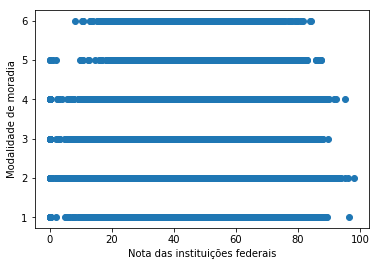

In [19]:
import matplotlib.pyplot as plt
import matplotlib


#visualmente
plt.scatter( fedPresencial.NT_GER, fedPresencial.QE_I06)
plt.ylabel('Modalidade de moradia')
plt.xlabel('Nota das instituições federais')

#plt.axis(( 0, 100, 1, 6))
plt.show()

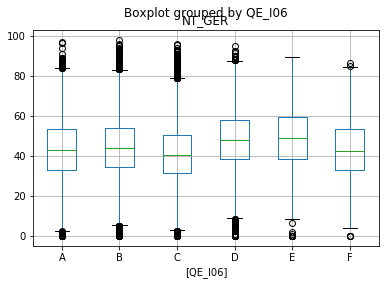

In [20]:
#Como verificar se a média dos alunos do campo QE_I05 para todos os alunos são realmente diferentes
qe06 = pandas.DataFrame(tabela, columns=['NT_GER', 'QE_I06'])
qe06.boxplot(by='QE_I06')



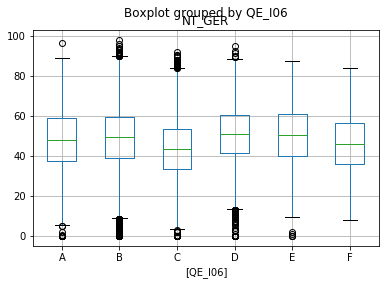

In [21]:
#para os alunos de instituições federais
qe06 = pandas.DataFrame(federal, columns=['NT_GER', 'QE_I06'])
qe06.boxplot(by='QE_I06')

In [22]:
#A análise de variância (ANOVA) é um teste usado para comparar as médias de dois grupos. 
#suposições: normalidade, independência e variância homegênea

#nota geral agrupada pela questão 06
tabela['NT_GER'].groupby(tabela['QE_I06']).describe()


,count,mean,std,min,25%,50%,75%,max
QE_I06,,,,,,,,
A,31348.0,43.500695,14.535478,0.0,33.000,42.8,53.4,97.0
B,233955.0,44.468462,13.914832,0.0,34.500,44.0,54.0,98.1
C,143888.0,41.321497,13.756141,0.0,31.400,40.5,50.5,96.2
D,28525.0,48.078307,14.201474,0.0,38.300,48.2,58.0,95.1
E,1696.0,48.664269,15.332293,0.0,38.600,49.0,59.3,89.4
F,3456.0,43.387297,14.505435,0.0,32.875,42.7,53.6,86.4


In [26]:
#Estatisticas manuais
#federais = 104970
print('Quantidade de estudantes de instituições federais = 104970')
#federais presenciais = 97062
print('Quantidade de estudantes de instituições federais na modalidade presencial = 97062')
#B = 54650.000000 
print('Porcentagens % (B e C moram com familiares e resto não):')
print('B = %.3f' % (5465000/97062) + '%')
#C = 16689
print('C = %.3f' % (1668900/97062)+ '%')
#A = 7752
print('A = %.3f' % (775200/97062)+ '%')
#D = 14091
print('D = %.3f' % (1409100/97062)+ '%')
#E = 1083.000000
print('E = %.3f' % (108300/97062)+ '%')
#F = 1109
print('F = %.3f' % (110900/97062)+ '%')
print('B + C = %.3f' % ((5465000/97062) +(1668900/97062))+ '%')
print('A + D + E + F = %.3f' % ((775200/97062) +(1409100/97062)+(108300/97062)+(110900/97062))+ '%')

#Total = 95374
print('Total respondidos = %.3f' % (9537400/97062)+ '%')
#Nao declararam = 1688
print('Não responderam = %.3f' % (168800/97062)+ '%')


Quantidade de estudantes de instituições federais = 104970
Quantidade de estudantes de instituições federais na modalidade presencial = 97062
Porcentagens % (B e C moram com familiares e resto não):
B = 56.304%
C = 17.194%
A = 7.987%
D = 14.518%
E = 1.116%
F = 1.143%
B + C = 73.498%
A + D + E + F = 24.763%
Total respondidos = 98.261%
Não responderam = 1.739%


**Links utilizados:**

http://portal.inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/mec-e-inep-divulgam-resultados-do-enade-2017-e-indicadores-de-qualidade-da-educacao-superior/21206

http://portal.inep.gov.br/web/guest/microdados

https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93